In [1]:
import cv2 
import numpy as np
import glob
import random 
import ipyplot 
from matplotlib import pyplot as plt 
import pickle

In [2]:
train_images_resized = pickle.load( open( r"C:\Users\paul.ilioaica\Desktop\Facultate_Master\CV1\Lab\Images\dump_train_images_resized", "rb" ) )
test_images_resized = pickle.load( open( r"C:\Users\paul.ilioaica\Desktop\Facultate_Master\CV1\Lab\Images\dump_test_images_resized", "rb" ) )
train_images_resized_gray = pickle.load( open( r"C:\Users\paul.ilioaica\Desktop\Facultate_Master\CV1\Lab\Images\dump_train_images_resized_gray", "rb" ) )
test_images_resized_gray = pickle.load( open( r"C:\Users\paul.ilioaica\Desktop\Facultate_Master\CV1\Lab\Images\dump_test_images_resized_gray", "rb" ) )

In [28]:
test = []
label_list = []
for im_set in test_images_resized:
  for im in im_set:
    hsvim = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 25, 25], dtype = "uint8")
    upper = np.array([25, 255, 255], dtype = "uint8")
    skinRegionHSV = cv2.inRange(hsvim, lower, upper)
    blurred = cv2.blur(skinRegionHSV, (3,3))
    ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv2.contourArea(x))
    hull = cv2.convexHull(contours, returnPoints=False)
    defects = cv2.convexityDefects(contours, hull)
    if defects is not None:
        cnt = 0
        for i in range(defects.shape[0]):  # calculate the angle
            s, e, f, d = defects[i][0]
            start = tuple(contours[s][0])
            end = tuple(contours[e][0])
            far = tuple(contours[f][0])
            a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  #      cosine theorem
            if angle <= np.pi / 2:  # angle less than 90 degree, treat as fingers
                cnt += 1
        if cnt > 0:
            cnt = cnt+1
        print(cnt)
        label_list.append(cnt)
    else:
        label_list.append(None)
    test.append(thresh)

3
4
3
3
2
3
3
0
0
6
7
7


In [29]:
train = []
label_list = []
for im_set in train_images_resized:
  sk = []
  dt_sk = []
  for im in im_set:
    hsvim = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 25, 25], dtype = "uint8")
    upper = np.array([25, 255, 255], dtype = "uint8")
    skinRegionHSV = cv2.inRange(hsvim, lower, upper)
    blurred = cv2.blur(skinRegionHSV, (3,3))
    ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv2.contourArea(x))
    hull = cv2.convexHull(contours, returnPoints=False)
    defects = cv2.convexityDefects(contours, hull)
    if defects is not None:
        cnt = 0
        for i in range(defects.shape[0]):  # calculate the angle
            s, e, f, d = defects[i][0]
            start = tuple(contours[s][0])
            end = tuple(contours[e][0])
            far = tuple(contours[f][0])
            a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  #      cosine theorem
            if angle <= np.pi / 2:  # angle less than 90 degree, treat as fingers
                cnt += 1
        if cnt > 0:
            cnt = cnt+1
        label_list.append(cnt)
    else:
        label_list.append(None)
    train.append(thresh)



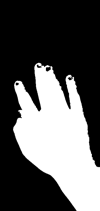
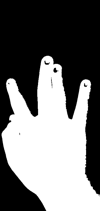
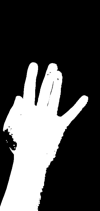
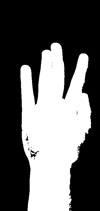
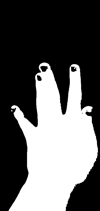
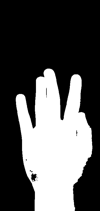
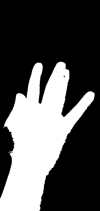
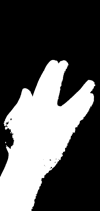
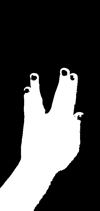
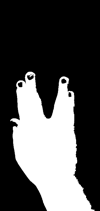
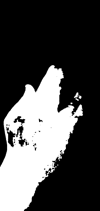
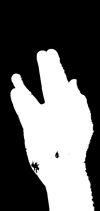
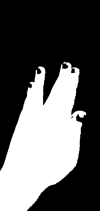
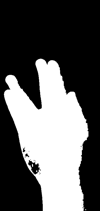
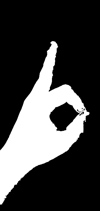
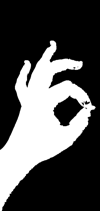
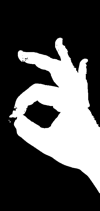
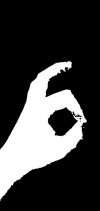
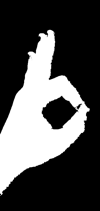
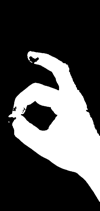
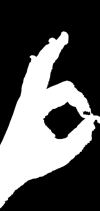
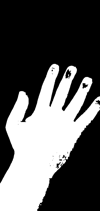
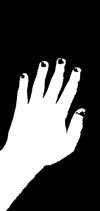
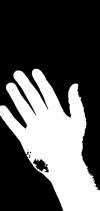
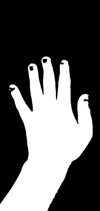
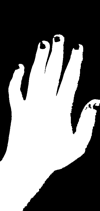
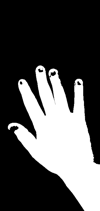
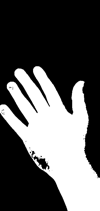


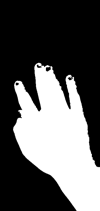
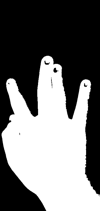
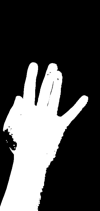
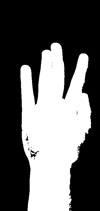
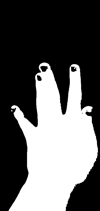
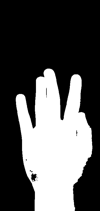
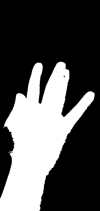
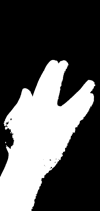
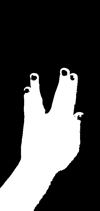
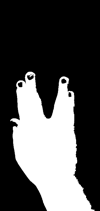
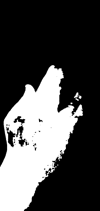
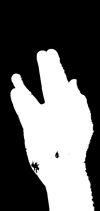
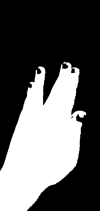
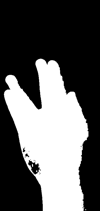
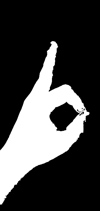
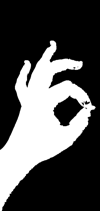
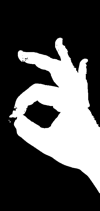
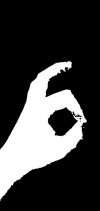
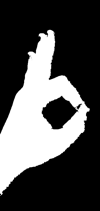
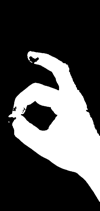
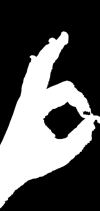
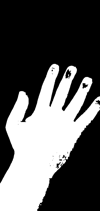
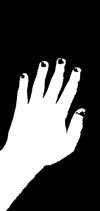
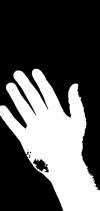
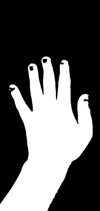
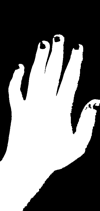
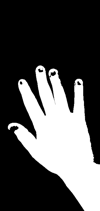
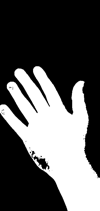

In [36]:
ipyplot.plot_images(train, max_images=50, img_width=100)

In [8]:
def classifier(number_of_fingers):
    if number_of_fingers >= 5:
        return 3
    elif number_of_fingers == 4:
        return 2
    elif number_of_fingers == 3:
        return 0
    elif number_of_fingers < 3 :
        return 1

In [9]:
results = [classifier(x) for x in label_list]

In [12]:
test_labels = [0,0,0, 1,1,1,2,2,2,3,3,3]
sum(x==y for x,y in zip(results,test_labels))/len(test_labels)

0.5

In [94]:
from skimage.morphology import skeletonize

train = []
label_list = []
for im_set in train_images_resized:
  for im in im_set:
    hsvim = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 30, 30], dtype = "uint8")
    upper = np.array([30, 255, 255], dtype = "uint8")
    skinRegionHSV = cv2.inRange(hsvim, lower, upper)
    blurred = cv2.blur(skinRegionHSV, (5,5))
    ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
    train.append(thresh)
test = []
label_list = []
for im_set in test_images_resized:
  for im in im_set:
    hsvim = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 30, 30], dtype = "uint8")
    upper = np.array([30, 255, 255], dtype = "uint8")
    skinRegionHSV = cv2.inRange(hsvim, lower, upper)
    blurred = cv2.blur(skinRegionHSV, (5,5))
    ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
#     skeleton = skeletonize(thresh/255, method="lee")
    test.append(thresh)
    


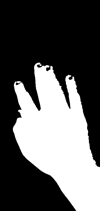
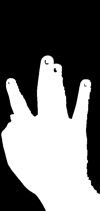
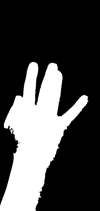
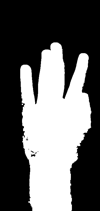
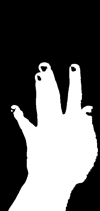
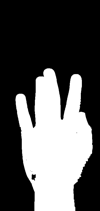
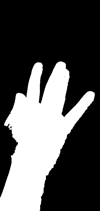
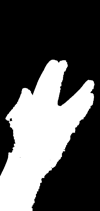
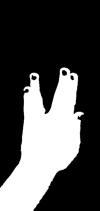
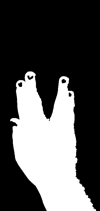
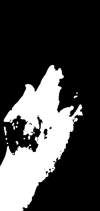
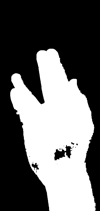
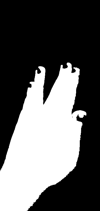
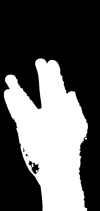
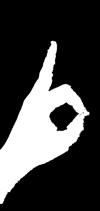
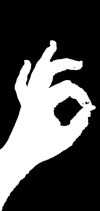
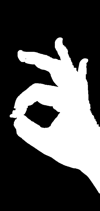
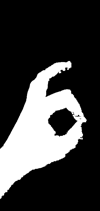
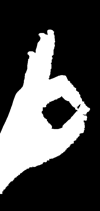
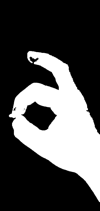
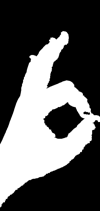
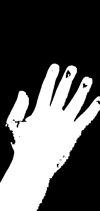
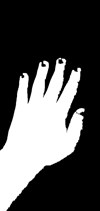
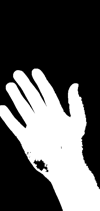
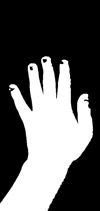
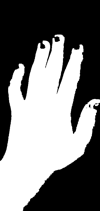
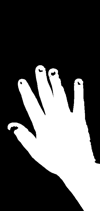
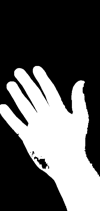


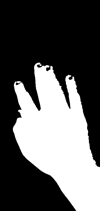
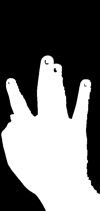
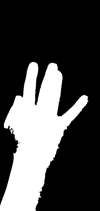
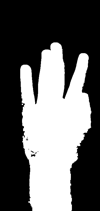
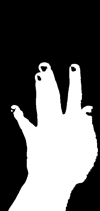
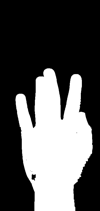
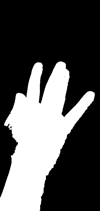
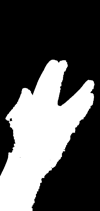
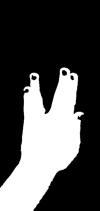
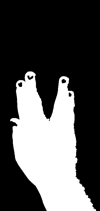
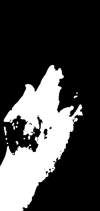
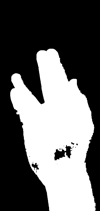
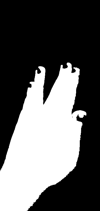
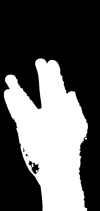
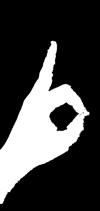
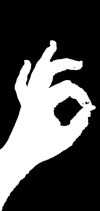
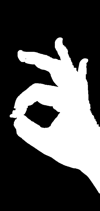
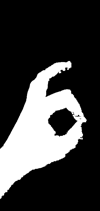
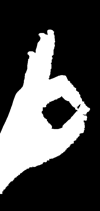
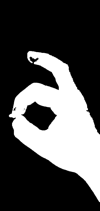
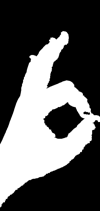
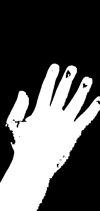
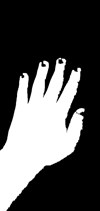
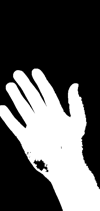
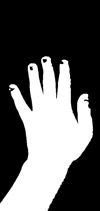
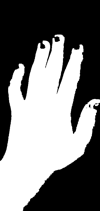
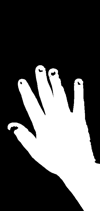
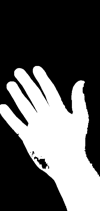

In [104]:
ipyplot.plot_images(train, max_images=50, img_width=100)

In [49]:
print(thresh[thresh!=0])

[255 255 255 ... 255 255 255]


In [105]:
def get_cosine(a,b):
    return spatial.distance.cosine(a, b)

from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=5, metric=get_cosine).fit(np.array([x.reshape(-1) for x in train]),[j for i in range(7) for j in range(4)])

In [109]:
test_labels_cos = nbrs.predict(np.array([x.reshape(-1) for x in test]))

In [112]:
sum(x==y for x,y in zip(results,test_labels_cos))/len(test_labels_cos)

0.5